# Objective

If we can control demand, we may be able to use it to balance the system instead of curtailing
generators. This could provide a number of benefits: 
- it would reduce wastage of renewable energy and thus increase the fraction of energy generated by renewables within the UK;
- it could provide access to cheaper energy for local consumers on Orkney, reducing fuel poverty and linking locals to the benefits of wind turbine development on the isles;
- it would increase the revenue of generators close to the top of the curtailment order and therefore improve the business case for building new (marginal) generators;
- it could help to avoid more costly network capacity upgrades, which would be an alternative solution to the curtailment problem

Wind turbines in the industrial field usually limit the output power at a power set-point, which is always below the optimal operating condition. 

Q: What to do with power > set point?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

# residential_demand.csv 

In [3]:
df_demand = pd.read_csv('residential_demand.csv',parse_dates=['Timestamp'], infer_datetime_format= True)

In [4]:
df_demand.head(3)

,Timestamp,Demand_mean_kw,N_households
0,2017-01-01 00:00:00,0.220106,5428
1,2017-01-01 00:30:00,0.205945,5429
2,2017-01-01 01:00:00,0.189090,5429


In [5]:
# no null data
df_demand.isnull().describe()

,Timestamp,Demand_mean_kw,N_households
count,17568,17568,17568
unique,1,1,1
top,False,False,False
freq,17568,17568,17568


In [6]:
# no 0 data
df_demand.describe()

,Demand_mean_kw,N_households
count,17568.000000,17568.000000
mean,0.219090,8630.642133
std,0.090129,2999.141750
min,0.086607,5406.000000
25%,0.143592,6781.000000
50%,0.212315,8190.500000
75%,0.273678,9652.000000
max,0.509662,30037.000000


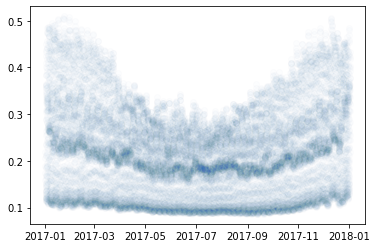

In [7]:
plt.scatter(df_demand['Timestamp'] , df_demand['Demand_mean_kw'], alpha=0.01)

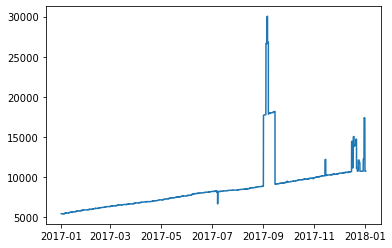

In [8]:
plt.plot(df_demand['Timestamp'] , df_demand['N_households'])

# There're 4 spikes, data to be removed ......

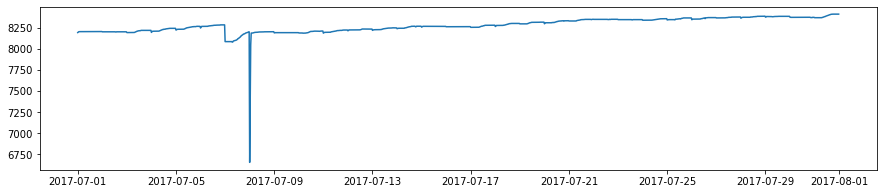

In [9]:
n=7
plt.figure(figsize=(15,3))
plt.plot(df_demand[df_demand['Timestamp'].dt.month == n]['Timestamp'], df_demand[df_demand['Timestamp'].dt.month == n]['N_households'])

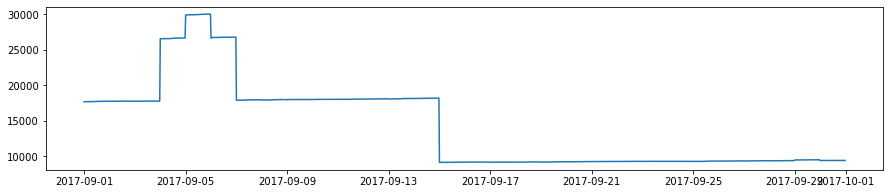

In [10]:
n=9
plt.figure(figsize=(15,3))
plt.plot(df_demand[df_demand['Timestamp'].dt.month == n]['Timestamp'], df_demand[df_demand['Timestamp'].dt.month == n]['N_households'])

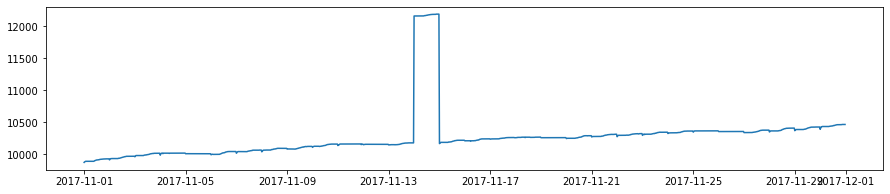

In [11]:
n=11
plt.figure(figsize=(15,3))
plt.plot(df_demand[df_demand['Timestamp'].dt.month == n]['Timestamp'], df_demand[df_demand['Timestamp'].dt.month == n]['N_households'])

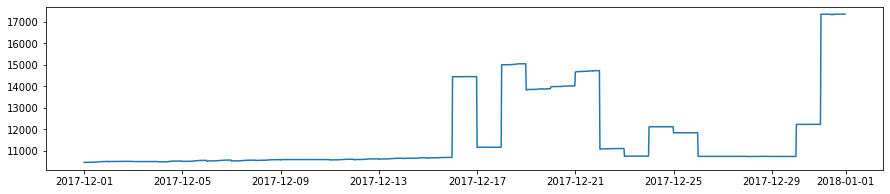

In [12]:
n=12
plt.figure(figsize=(15,3))
plt.plot(df_demand[df_demand['Timestamp'].dt.month == n]['Timestamp'], df_demand[df_demand['Timestamp'].dt.month == n]['N_households'])

# turbine_telemetry.csv

In [13]:
df_supply = pd.read_csv('turbine_telemetry.csv',parse_dates=['Timestamp'], infer_datetime_format= True)
df_supply.head(3)

,Timestamp,Power_kw,Setpoint_kw,Wind_ms
0,2015-05-28 00:00:23,80.0,900.0,4.9
1,2015-05-28 00:01:23,78.0,900.0,5.4
2,2015-05-28 00:02:23,52.0,900.0,4.9


In [14]:
df_supply.isnull().describe()
# Q: What should we do with Null Power_kw, Setpoint_kw, Wind_ms? Remove from dataset?

,Timestamp,Power_kw,Setpoint_kw,Wind_ms
count,1069636,1069636,1069636,1069636
unique,1,2,2,2
top,False,False,False,False
freq,1069636,1066934,1066921,1066931


In [15]:
df_supply.describe()
# Q: What should we do with 0 Power_kw, Setpoint_kw, Wind_ms? Remove from dataset?

,Power_kw,Setpoint_kw,Wind_ms
count,1.066934e+06,1.066921e+06,1.066931e+06
mean,3.671871e+02,8.106578e+02,9.955093e+00
std,3.399636e+02,2.615071e+02,5.453944e+00
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.100000e+01,9.000000e+02,6.100000e+00
50%,2.510000e+02,9.000000e+02,9.000000e+00
75%,7.040000e+02,9.000000e+02,1.240000e+01
max,9.380000e+02,9.000000e+02,4.720000e+01


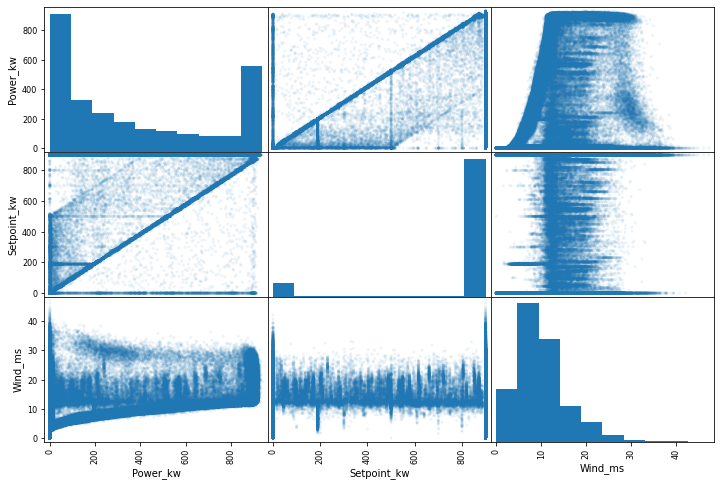

In [16]:
from pandas.plotting import scatter_matrix

#----------------------------------
#draw a scatterplot to look the relationship of each variables
d=scatter_matrix(df_supply, figsize=(12,8),alpha=0.08)

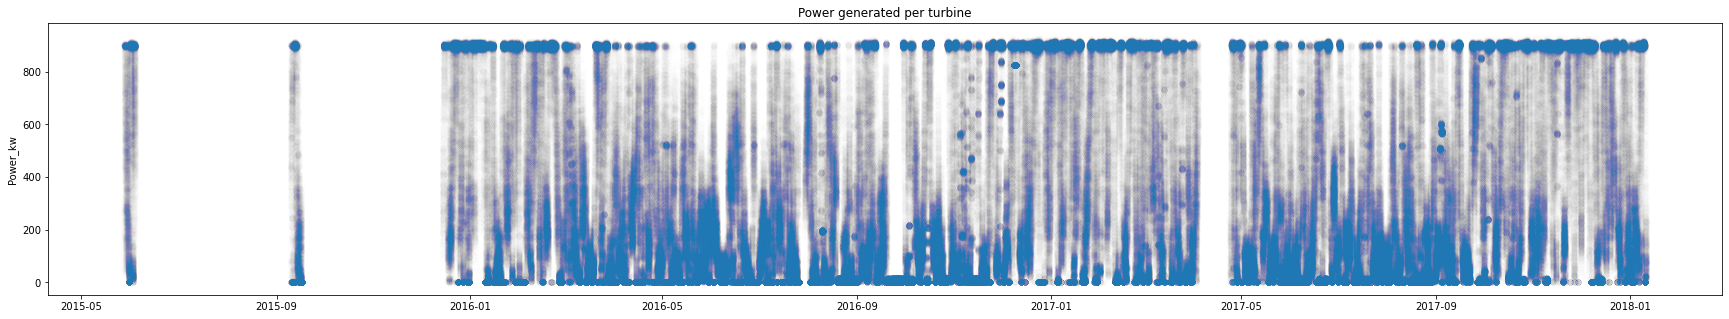

In [17]:
n=13
colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
plt.figure(figsize=(30,5))
plt.scatter(df_supply['Timestamp'], df_supply['Power_kw'], alpha = 0.005)
plt.ylabel('Power_kw')
plt.title('Power generated per turbine')

plt.show()

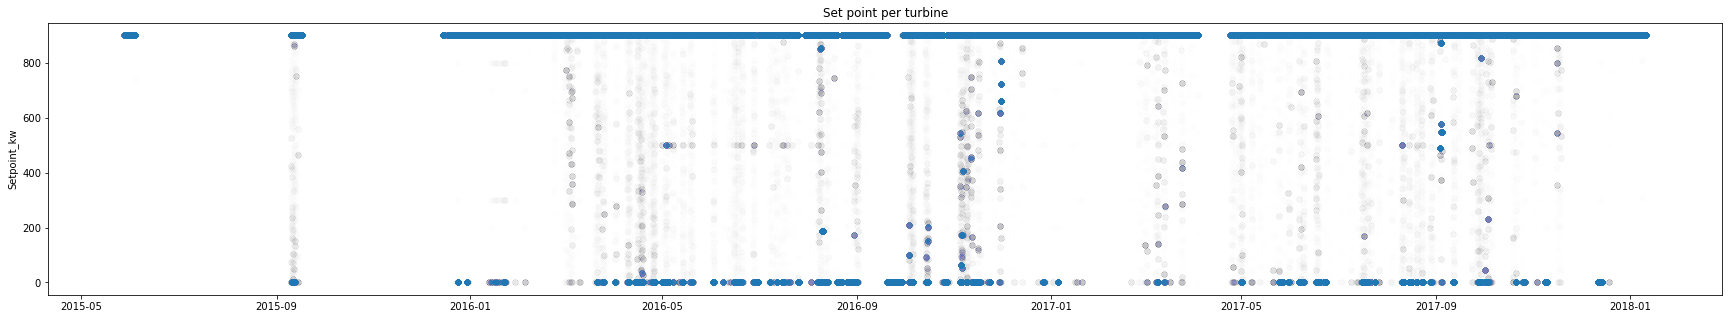

In [18]:
n=13
colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
plt.figure(figsize=(30,5))
plt.scatter(df_supply['Timestamp'], df_supply['Setpoint_kw'], alpha = 0.005)
plt.ylabel('Setpoint_kw')
plt.title('Set point per turbine')

plt.show()

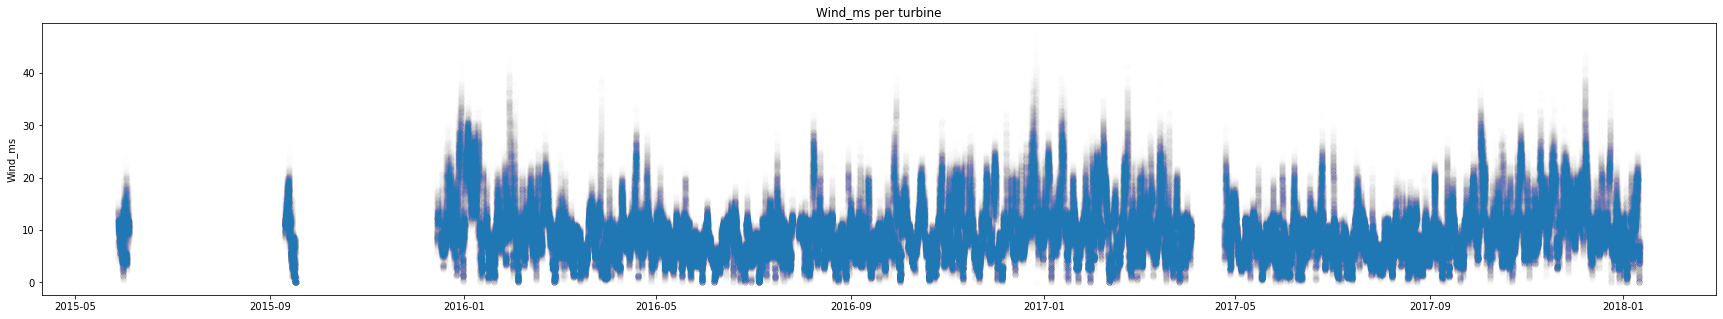

In [19]:
n=13
colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
plt.figure(figsize=(30,5))
plt.scatter(df_supply['Timestamp'], df_supply['Wind_ms'], alpha = 0.005)
plt.ylabel('Wind_ms')
plt.title('Wind_ms per turbine')

plt.show()

# Choosing blade length for potential power calculation

We tried to find the blade length where the potential power generated is the closest to the actual power ...... power points bounced evenly around the 26 curve....

Vertical line wind speed 12m/s is plotted to show us .....

Length = 26m is the best fitted 

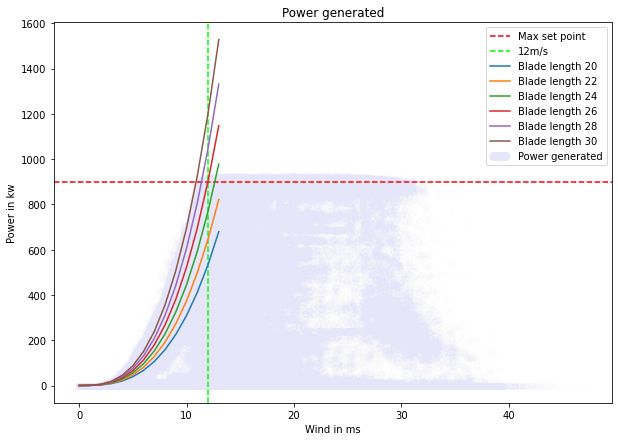

In [20]:
plt.figure(figsize=(10,7))

plt.scatter(df_supply['Wind_ms'],df_supply['Power_kw'], alpha=0.008, label='Power generated', color='lavender')
plt.axhline(y=900, color='r', linestyle='--', label='Max set point')
plt.axvline(12, color='lime', linestyle='--', label='12m/s')

# potential power curve
w = np.array(range(0,14)) # wind speed
length = range(20,31,2) # blade length in m
for l in length:
    potential_power=0.5*1.23*(np.pi*l**2)*(w**3)*0.4/1000
    plt.plot(potential_power, label='Blade length '+str(l))
    
plt.xlabel('Wind in ms')
plt.ylabel('Power in kw')
plt.title('Power generated')
plt.legend(scatterpoints=1000)
plt.show()

# Curtailed power (kW)

#### What is curtailed power?
How $strong$ the current is ......

#### Curtailed power equation
curtailed power (kW) = potential power - total power consumed 

where,
- potential power: before 12m/s = theoratical potential power ; after 12m/s = 900kW (Max set point due to mechanical limitation. Theoratically can reach a higher power but practically constrainted by current mechanical design.)
- total power consumed = total power generated (Power_kw)

# Curtailed energy (kWh)

#### What is curtailed energy?
How $much$ energy actually curtailed....
We are interested in curtailed energy, not curtailed power because electricity provider charge us in terms of energy, not power.

- Energy: aggregate to area in time chart

#### Curtailed energy equation
Curtailed energy (kWh) = curtailed power * 60 sec x 0.278 x 10^-3 

# Curtailment computation
Data used:
- df_supply: Drop NA and 0 records	
- df_demand: Drop 2018 and household number outliers
- Energy supply and demand should be quite constant in particular months across year, summer months should have less wind than winter months. Therefore, it is alright to have different years of supply and demand data, we can take the averages by months regardless year for curtailment calculation.

Columns:
- Time_month:	e.g. 1 ,2,3,4…12
- Time_hour:	e.g. 0,1,2…23
- Demand_mean_kw:	the mean demand of the sample of households during the measurement period
- N_households:	the mean number of households included in the aggregate statistics of the measurement period.
- Power_kw:	average power in kW during the measurement period
- Setpoint_kw:	the mean maximum-allowed generator output during the measurement period
- Wind_ms:	mean wind speed at the turbine during the measurement period.
- Potential_power_kw:	potential energy of single turbine = 0.5 * 1.23 * (pi * 26^2) * wind speed ^3 * 0.4 / 1000
- Curtailment_kw: curtailed power per turbine
- Curtailment_kw_total:	Assuming we have 500 turbines on the land, we have estimated total curtailed power 500 * curtailed power per turbine

In [231]:
df_curtail = df_supply[:].replace(0,np.nan).dropna() # drop NA and 0 Power_kw, Setpoint_kw, Wind_ms
df_curtail['Potential_power_kw'] = 0.5*1.23*np.pi*26**2*(df_curtail['Wind_ms']**3)*0.4/1000
df_curtail['Potential_power_kw'][df_curtail['Wind_ms'] >= 12] = 900
df_curtail['Cutailed_power_kw'] = df_curtail['Potential_power_kw'] - df_curtail['Power_kw']
df_curtail['Cutailed_power_kw'][df_curtail['Cutailed_power_kw'] < 0] = 0 # set negative curtailment to 0
df_curtail['Cutailed_energy_in_1_minute_kwh'] = df_curtail['Cutailed_power_kw']*60 * 0.278 /100
df_curtail.head(3)

,Timestamp,Power_kw,Setpoint_kw,Wind_ms,Potential_power_kw,Cutailed_power_kw,Cutailed_energy_in_1_minute_kwh
0,2015-05-28 00:00:23,80.0,900.0,4.9,61.463872,0.000000,0.000000
1,2015-05-28 00:01:23,78.0,900.0,5.4,82.264593,4.264593,0.711334
2,2015-05-28 00:02:23,52.0,900.0,4.9,61.463872,9.463872,1.578574


Q: what to do with negative Cutailed_power_kw? Change to 0 because no curtailment

In [232]:
tmp = df_curtail[:]
tmp['Time_yyyymm'] = tmp.Timestamp.dt.strftime('%Y-%m')
tmp['Time_year'] = tmp.Timestamp.dt.year
tmp['Time_month'] = tmp.Timestamp.dt.month
tmp['Time_hour'] = tmp.Timestamp.dt.hour

# Hourly sum of curtailed power
Sum_YearMonthHour_curtailed_power_kW = pd.pivot_table(tmp, index=['Time_year','Time_month','Time_hour'], values='Cutailed_power_kw', aggfunc='sum').rename(columns={'Cutailed_power_kw': 'Hourly_curtailed_power_kw'})

# Monthly sum of curtailed power
Sum_YearMonth_curtailed_power_kW = pd.pivot_table(tmp, index=['Time_year','Time_month'], values='Cutailed_power_kw', aggfunc='sum').rename(columns={'Cutailed_power_kw': 'Monthly_curtailed_power_kw'})


In [233]:
Sum_YearMonth_curtailed_power_kW

Monthly_curtailed_power_kw
Time_year Time_month                            
2015      5                         7.658420e+04
          6                         6.261108e+04
          9                         5.122777e+05
          12                        7.492821e+05
2016      1                         1.342989e+06
          2                         9.390475e+05
          3                         1.730282e+06
          4                         2.510759e+06
          5                         1.346815e+06
          6                         1.306823e+06
          7                         1.215300e+06
          8                         1.507108e+06
          9                         6.977736e+05
          10                        1.929767e+06
          11                        3.024011e+06
          12                        1.010571e+06
2017      1                         1.101693e+06
          2                         8.666071e+05
          3                         1.515769e+06
          4                         5.454535e+05
          5                         1.280810e+06
          6                         1.316905e+06
          7                         1.261707e+06
          8                         1.500573e+06
          9                         1.763012e+06
          10                        1.701573e+06
          11                        1.055904e+06
          12                        1.122483e+06
2018      1                         2.130343e+05

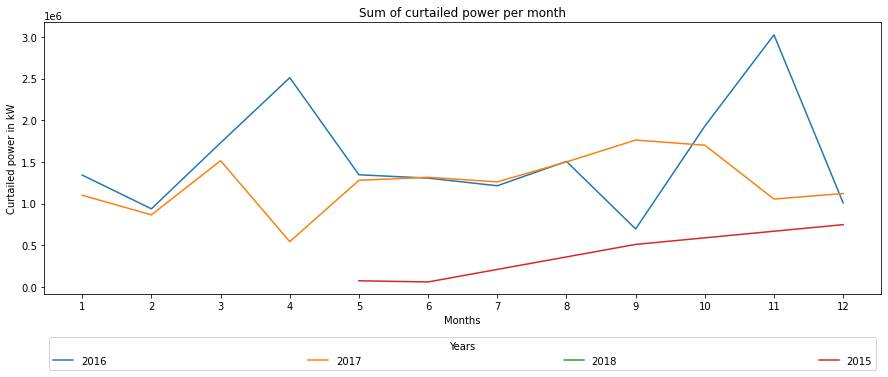

In [234]:
plt.figure(figsize=(15,5))
for i in set(df_curtail.Timestamp.dt.year):
    plt.plot(Sum_YearMonth_curtailed_power_kW.loc[(i)], label=i)
plt.ylabel('Curtailed power in kW')
plt.xlabel('Months')
plt.xticks(range(1,13,1))
plt.title('Sum of curtailed power per month')
plt.legend(title='Years',bbox_to_anchor=(0., -0.24, 1, .102),ncol=6, mode="expand",loc='upper center')

plt.show()

In [235]:
tmp = df_curtail[:]
tmp['Time_yyyymm'] = tmp.Timestamp.dt.strftime('%Y-%m')
tmp['Time_year'] = tmp.Timestamp.dt.year
tmp['Time_month'] = tmp.Timestamp.dt.month
tmp['Time_hour'] = tmp.Timestamp.dt.hour

# Hourly sum of curtailed energy
Sum_YearMonthHour_curtailed_energy_kWh = pd.pivot_table(tmp, index=['Time_year','Time_month','Time_hour'], values='Cutailed_energy_in_1_minute_kwh', aggfunc='sum').reset_index().rename(columns={'Cutailed_energy_in_1_minute_kwh': 'Hourly_curtailed_energy_kwh'})
# Monthly sum of curtailed energy
Sum_YearMonth_curtailed_energy_kWh = pd.pivot_table(tmp, index=['Time_year','Time_month'], values='Cutailed_energy_in_1_minute_kwh', aggfunc='sum').rename(columns={'Cutailed_energy_in_1_minute_kwh': 'YearMonth_Sum_curtailed_energy_kWh'})

# Average curtailed energy per hour
Avg_MonthHour_curtailed_energy_kWh = pd.pivot_table(Sum_YearMonthHour_curtailed_energy_kWh, index=['Time_month','Time_hour'], values='Hourly_curtailed_energy_kwh', aggfunc='mean').rename(columns={'Hourly_curtailed_energy_kwh': 'MonthHour_Avg_curtailed_energy_kWh'})
# Average curtailed energy per months
tmp = Sum_YearMonth_curtailed_energy_kWh.reset_index()
Avg_Month_curtailed_energy_kWh = pd.pivot_table(tmp, index=['Time_month'], values='YearMonth_Sum_curtailed_energy_kWh', aggfunc='mean').rename(columns={'YearMonth_Sum_curtailed_energy_kWh': 'Month_Avg_curtailed_energy_kWh'})


In [236]:
Sum_YearMonthHour_curtailed_energy_kWh.head(3)

,Time_year,Time_month,Time_hour,Hourly_curtailed_energy_kwh
0,2015,5,0,280.963082
1,2015,5,1,280.373090
2,2015,5,2,321.438916


In [237]:
Sum_YearMonth_curtailed_energy_kWh.head(3)

YearMonth_Sum_curtailed_energy_kWh
Time_year Time_month                                    
2015      5                                 12774.245076
          6                                 10443.527481
          9                                 85447.918778

In [238]:
Avg_MonthHour_curtailed_energy_kWh.head(3)

MonthHour_Avg_curtailed_energy_kWh
Time_month Time_hour                                    
1          0                                 8488.907984
           1                                 7095.622847
           2                                 6922.609888

In [239]:
Avg_Month_curtailed_energy_kWh.head(3)

,Month_Avg_curtailed_energy_kWh
Time_month,
1,147768.975397
2,150591.592431
3,270720.610655


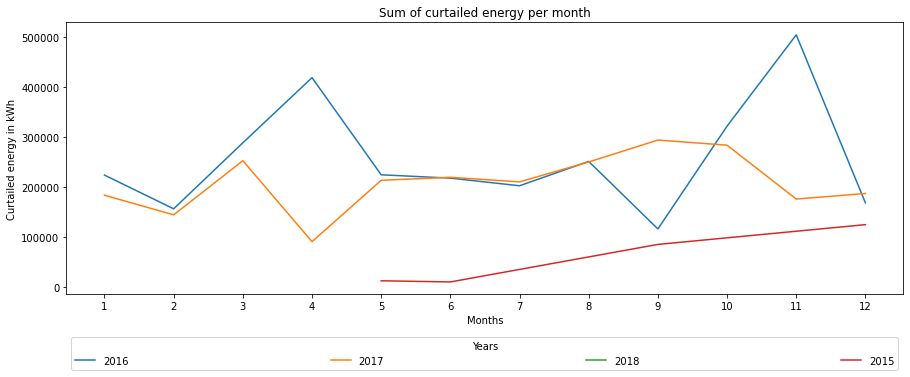

In [240]:
plt.figure(figsize=(15,5))
for i in set(df_curtail.Timestamp.dt.year):
    plt.plot(Sum_YearMonth_curtailed_energy_kWh.loc[(i)], label=i)
plt.ylabel('Curtailed energy in kWh')
plt.xlabel('Months')
plt.xticks(range(1,13,1))
plt.title('Sum of curtailed energy per month')
plt.legend(title='Years',bbox_to_anchor=(0., -0.24, 1, .102),ncol=6, mode="expand",loc='upper center')

plt.show()

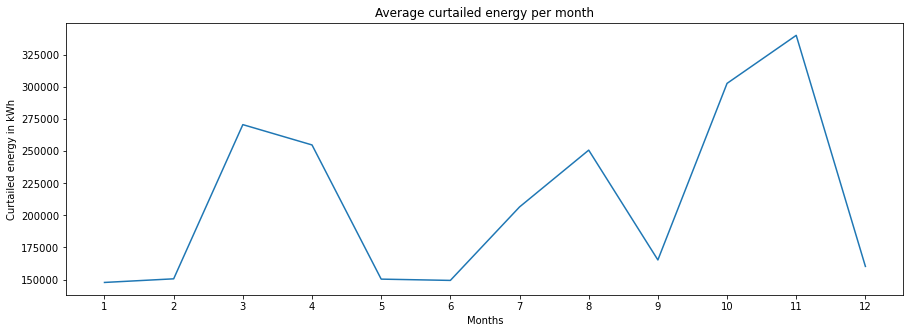

In [241]:
plt.figure(figsize=(15,5))
plt.plot(Avg_Month_curtailed_energy_kWh)
plt.ylabel('Curtailed energy in kWh')
plt.xlabel('Months')
plt.xticks(range(1,13,1))
plt.title('Average curtailed energy per month')

plt.show()

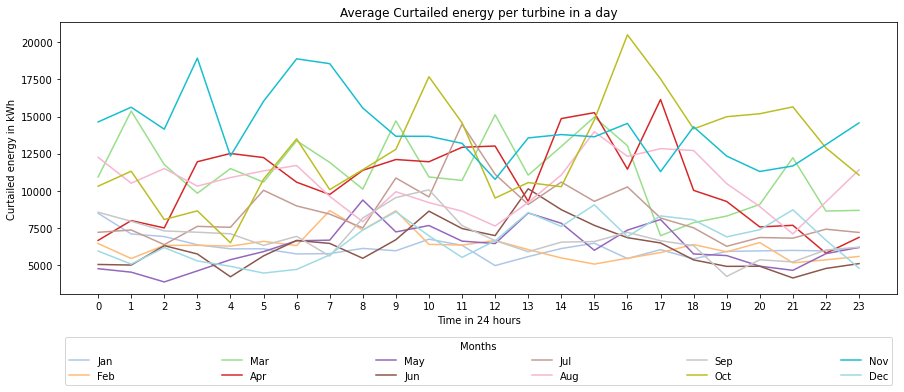

In [244]:
n=13
colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
plt.figure(figsize=(15,5))
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(1,n):
    plt.plot(Avg_MonthHour_curtailed_energy_kWh.loc[(i),'MonthHour_Avg_curtailed_energy_kWh'], label=month[i-1], color=colors[i])
plt.ylabel('Curtailed energy in kWh')
plt.xlabel('Time in 24 hours')
plt.xticks(range(0,24,1))
plt.title('Average Curtailed energy per turbine in a day')
plt.legend(title='Months',bbox_to_anchor=(0., -0.24, 1, .102),ncol=6, mode="expand",loc='upper center')

plt.show()

In [247]:
# Averge demands per households

tmp=df_demand[df_demand.Timestamp.dt.year == 2017] # 2018 only have one month data. Drop 2018 for easier calculation.
tmp=tmp.drop(index = tmp['N_households'][tmp['Timestamp'].dt.month == 7][tmp['N_households'] < 8000].index)
tmp=tmp.drop(index = tmp['N_households'][tmp['Timestamp'].dt.month == 9][tmp['N_households'] > 15000].index)
tmp=tmp.drop(index = tmp['N_households'][tmp['Timestamp'].dt.month == 11][tmp['N_households'] > 10500].index)
tmp=tmp.drop(index = tmp['N_households'][tmp['Timestamp'].dt.month == 12][tmp['N_households'] > 11000].index)
tmp['Time_month'] = tmp['Timestamp'].dt.month
tmp['Time_hour'] = tmp['Timestamp'].dt.hour

demand_avg = pd.pivot_table(tmp, index=['Time_month', 'Time_hour'], values='Demand_mean_kw', aggfunc=np.mean)
demand_avg

Demand_mean_kw
Time_month Time_hour                
1          0                0.161041
           1                0.131207
           2                0.117763
           3                0.110769
           4                0.111382
...                              ...
12         19               0.413689
           20               0.381565
           21               0.337721
           22               0.280429
           23               0.225276

[288 rows x 1 columns]

In [ ]:
tmp = df_supply.replace(0,np.nan).dropna() # drop NA and 0 Power_kw, Setpoint_kw, Wind_ms
tmp['Time_month'] = df_supply.Timestamp.dt.month
tmp['Time_hour'] = df_supply.Timestamp.dt.hour
power_avg = pd.pivot_table(tmp, index=['Time_month', 'Time_hour'], values='Power_kw', aggfunc=np.mean)
wind_avg = pd.pivot_table(tmp, index=['Time_month', 'Time_hour'], values='Wind_ms', aggfunc=np.mean)
set_point_avg = pd.pivot_table(tmp, index=['Time_month', 'Time_hour'], values='Setpoint_kw', aggfunc=np.mean)

In [ ]:
tmp=df_demand[df_demand.Timestamp.dt.year == 2017] # 2018 only have one month data. Drop 2018 for easier calculation.
tmp=tmp.drop(index = tmp['N_households'][tmp['Timestamp'].dt.month == 7][tmp['N_households'] < 8000].index)
tmp=tmp.drop(index = tmp['N_households'][tmp['Timestamp'].dt.month == 9][tmp['N_households'] > 15000].index)
tmp=tmp.drop(index = tmp['N_households'][tmp['Timestamp'].dt.month == 11][tmp['N_households'] > 10500].index)
tmp=tmp.drop(index = tmp['N_households'][tmp['Timestamp'].dt.month == 12][tmp['N_households'] > 11000].index)
tmp['Time_month'] = tmp['Timestamp'].dt.month
tmp['Time_hour'] = tmp['Timestamp'].dt.hour
demand_avg = pd.pivot_table(tmp, index=['Time_month', 'Time_hour'], values='Demand_mean_kw', aggfunc=np.mean)
N_households_avg = pd.pivot_table(tmp, index=['Time_month', 'Time_hour'], values='N_households', aggfunc=np.mean)

In [220]:
curtailment = demand_avg.join(N_households_avg).join(power_avg).join(set_point_avg).join(wind_avg)

curtailment['Potential_power_kw'] = 0.5*1.23*np.pi*26**2*(curtailment['Wind_ms']**3)*0.4/1000
curtailment['Potential_power_kw'][curtailment['Wind_ms'] >= 12] = 900
curtailment['Curtailed_power_kw'] = curtailment['Potential_power_kw'] - (curtailment['Demand_mean_kw']*curtailment['N_households'] + 40*1000) / 500
curtailment['Curtailed_power_kw_total'] = 500*curtailment['Curtailment_kw']

curtailment.head(3)

Demand_mean_kw  N_households    Power_kw  Setpoint_kw  \
Time_month Time_hour                                                          
1          0                0.161041   5657.258065  565.836015   900.000000   
           1                0.131207   5664.483871  583.204421   899.818205   
           2                0.117763   5664.693548  608.132205   899.683236   

                        Wind_ms  Potential_power_kw  Curtailment_kw  \
Time_month Time_hour                                                  
1          0          13.032235               900.0      818.177898   
           1          13.169909               900.0      818.513560   
           2          13.283342               900.0      818.665818   

                      Curtailment_kw_total  
Time_month Time_hour                        
1          0                 409088.948988  
           1                 409256.780224  
           2                 409332.908889

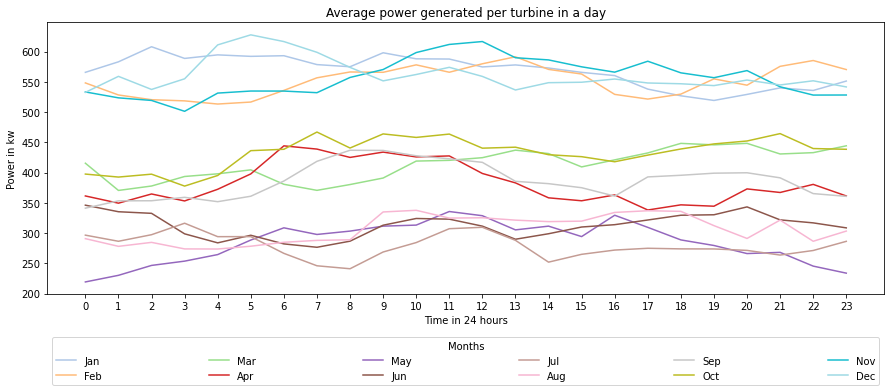

In [221]:
n=13
colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
plt.figure(figsize=(15,5))
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(1,n):
    plt.plot(curtailment.loc[(i),'Power_kw'], label=month[i-1], color=colors[i])
plt.ylabel('Power in kw')
plt.xlabel('Time in 24 hours')
plt.xticks(range(0,24,1))
plt.title('Average power generated per turbine in a day')
plt.legend(title='Months',bbox_to_anchor=(0., -0.24, 1, .102),ncol=6, mode="expand",loc='upper center')

plt.show()

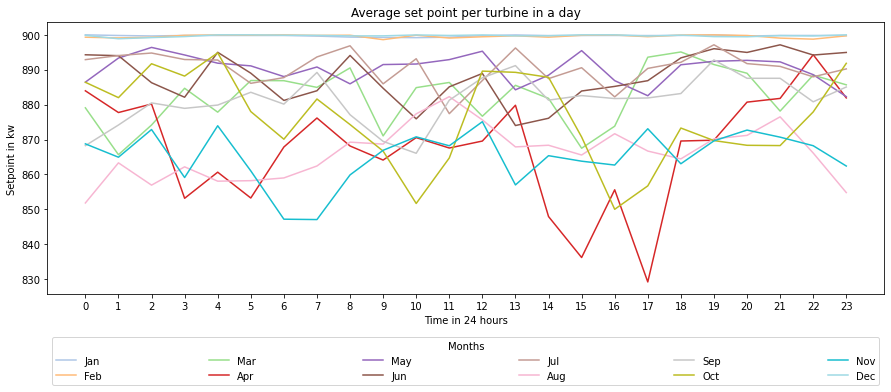

In [222]:
n=13
colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
plt.figure(figsize=(15,5))
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(1,n):
    plt.plot(curtailment.loc[(i),'Setpoint_kw'], label=month[i-1], color=colors[i])
plt.ylabel('Setpoint in kw')
plt.xlabel('Time in 24 hours')
plt.xticks(range(0,24,1))
plt.title('Average set point per turbine in a day')
plt.legend(title='Months',bbox_to_anchor=(0., -0.24, 1, .102),ncol=6, mode="expand",loc='upper center')

plt.show()

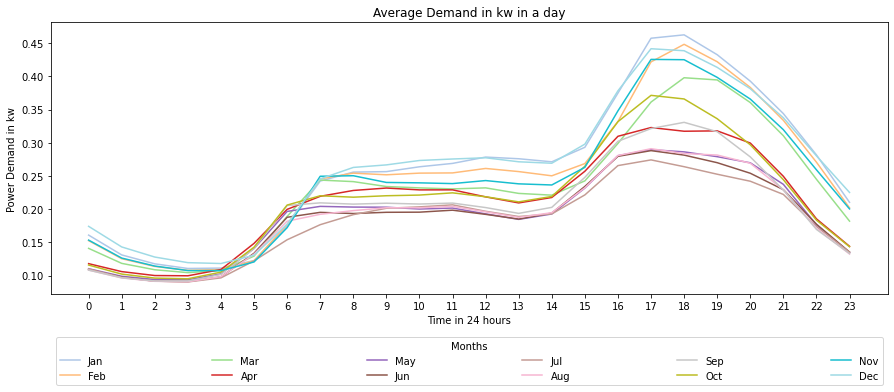

In [223]:
n=13
colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
plt.figure(figsize=(15,5))
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(1,n):
    plt.plot(curtailment.loc[(i),'Demand_mean_kw'], label=month[i-1], color=colors[i])
plt.ylabel('Power Demand in kw')
plt.xlabel('Time in 24 hours')
plt.xticks(range(0,24,1))
plt.title('Average Demand in kw in a day')
plt.legend(title='Months',bbox_to_anchor=(0., -0.24, 1, .102),ncol=6, mode="expand",loc='upper center')

plt.show()

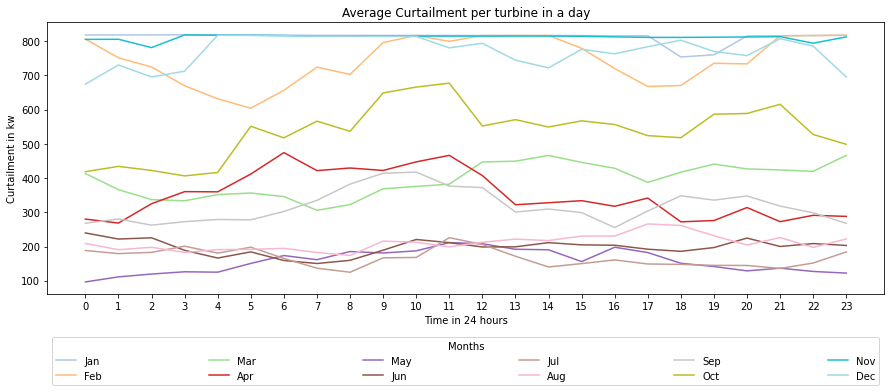

In [224]:
n=13
colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
plt.figure(figsize=(15,5))
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(1,n):
    plt.plot(curtailment.loc[(i),'Curtailment_kw'], label=month[i-1], color=colors[i])
plt.ylabel('Curtailment in kw')
plt.xlabel('Time in 24 hours')
plt.xticks(range(0,24,1))
plt.title('Average Curtailment per turbine in a day')
plt.legend(title='Months',bbox_to_anchor=(0., -0.24, 1, .102),ncol=6, mode="expand",loc='upper center')

plt.show()

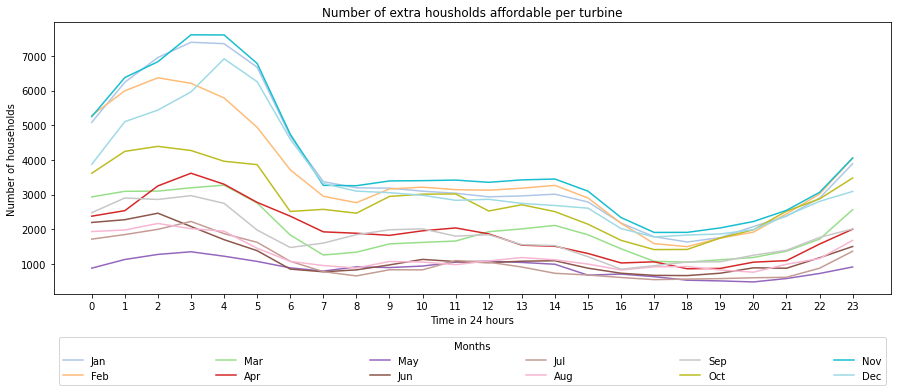

In [225]:
curtailment['Affordable_extra_households'] = curtailment['Curtailment_kw'] / curtailment['Demand_mean_kw']

n=13
colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
plt.figure(figsize=(15,5))
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(1,n):
    plt.plot(curtailment.loc[(i),'Affordable_extra_households'], label=month[i-1], color=colors[i])
plt.ylabel('Number of households')
plt.xlabel('Time in 24 hours')
plt.xticks(range(0,24,1))
plt.title('Number of extra housholds affordable per turbine')
plt.legend(title='Months',bbox_to_anchor=(0., -0.24, 1, .102),ncol=6, mode="expand",loc='upper center')

plt.show()

High wind speed but low power generated: demand is low during that time
Wind speed always high enough to support demand, so this is not a constraint

In [226]:
tmp = curtailment.reset_index(level=['Time_month', 'Time_hour'])
tmp

,Time_month,Time_hour,Demand_mean_kw,N_households,Power_kw,Setpoint_kw,Wind_ms,Potential_power_kw,Curtailment_kw,Curtailment_kw_total,Affordable_extra_households
0,1,0,0.161041,5657.258065,565.836015,900.000000,13.032235,900.000000,818.177898,409088.948988,5080.553613
1,1,1,0.131207,5664.483871,583.204421,899.818205,13.169909,900.000000,818.513560,409256.780224,6238.338928
2,1,2,0.117763,5664.693548,608.132205,899.683236,13.283342,900.000000,818.665818,409332.908889,6951.810484
3,1,3,0.110769,5664.806452,588.827205,899.820005,12.887683,900.000000,818.745034,409372.517003,7391.486579
4,1,4,0.111382,5664.854839,594.692112,899.821883,12.803969,900.000000,818.738072,409369.035923,7350.707426
...,...,...,...,...,...,...,...,...,...,...,...
283,12,19,0.413689,10616.400000,543.907652,899.493151,11.802149,858.845382,770.061605,385030.802641,1861.450249
284,12,20,0.381565,10616.700000,553.088049,899.444471,11.743860,846.182966,758.081047,379040.523710,1986.768720
285,12,21,0.337721,10617.150000,544.972055,899.773210,11.963811,894.623425,807.452150,403726.075118,2390.883414
286,12,22,0.280429,10617.225000,551.845593,899.679436,11.860470,871.640453,785.685703,392842.851499,2801.730424


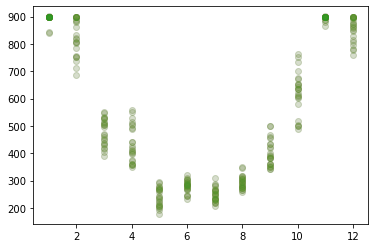

In [227]:
plt.scatter(tmp['Time_month'],tmp['Potential_power_kw'], alpha=0.1)
plt.scatter(tmp['Time_month'],tmp['Potential_power_kw'], alpha=0.1)
plt.scatter(tmp['Time_month'],tmp['Potential_power_kw'], alpha=0.1)

In [228]:
np.mean(tmp['Potential_power_kw'][tmp['Time_month'] == 1])

895.2466998682253

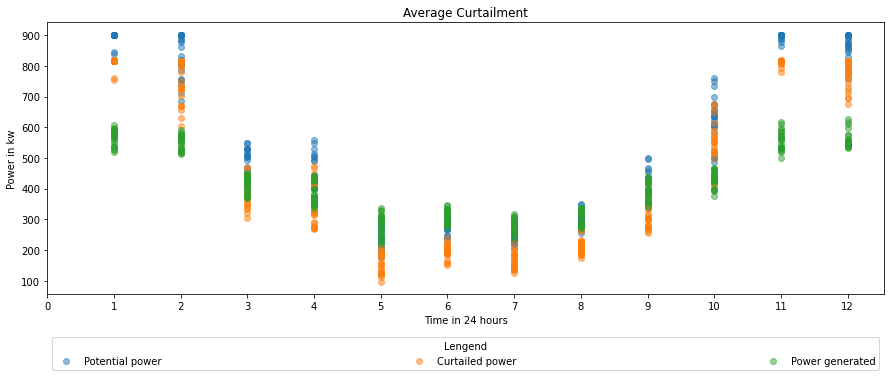

In [229]:
# Average curtailed energy in Jan
tmp = curtailment.reset_index(level=['Time_month', 'Time_hour'])
m = 6
plt.figure(figsize=(15,5))
plt.scatter(tmp['Time_month'], tmp['Potential_power_kw'], label='Potential power', alpha=0.5)
plt.scatter(tmp['Time_month'], tmp['Curtailment_kw'], label='Curtailed power', alpha=0.5)
plt.scatter(tmp['Time_month'], tmp['Power_kw'], label='Power generated', alpha=0.5)
plt.ylabel('Power in kw')
plt.xlabel('Time in 24 hours')
plt.xticks(range(0,13,1))
plt.title('Average Curtailment')
plt.legend(title='Lengend',bbox_to_anchor=(0., -0.24, 1, .102),ncol=6, mode="expand",loc='upper center')

plt.show()

ValueError: setting an array element with a sequence.

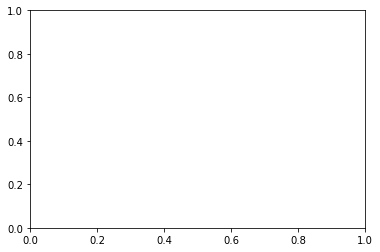

In [230]:
plt.plot(curtailment['Power_kw'], label='Power generated')